## 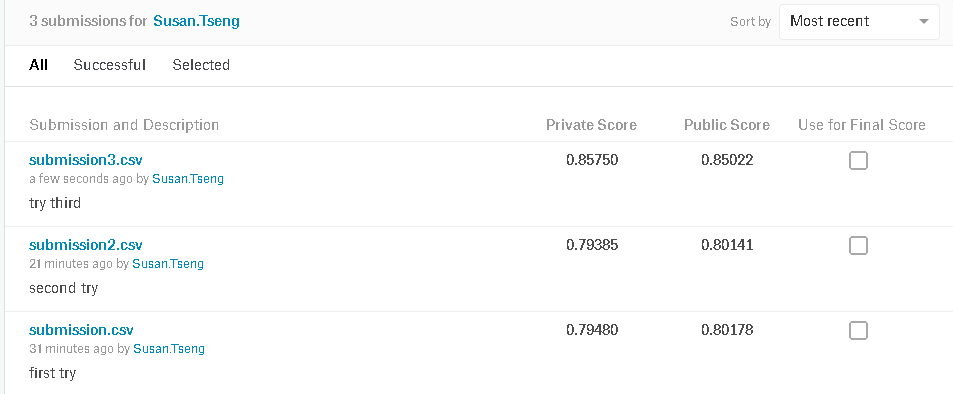

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data-science-london-scikit-learn/train.csv', header=None)
trainLabel = pd.read_csv('data-science-london-scikit-learn/trainLabels.csv', header=None)
test = pd.read_csv('data-science-london-scikit-learn/test.csv', header=None)
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [4]:
print('train shape:', train.shape)
print('test shape:', test.shape)
print('trainLabel shape:', trainLabel.shape)
train.head()

train shape: (1000, 40)
test shape: (9000, 40)
trainLabel shape: (1000, 1)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [6]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [7]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [25]:
x_train, x_test, y_train, y_test = train_test_split(train,trainLabel, test_size=0.25, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [26]:
print('Coefficients: ', regr.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [[-1.25283590e-03 -9.32488602e-03 -1.74211843e-02  1.48111792e-02
  -4.42706771e+10 -2.23419982e-03  4.89998109e+10  4.99794664e+10
   7.24437775e-04  1.83243752e-02 -1.83699131e-02 -8.74090195e-03
   2.66809753e+10 -2.95901299e-03  3.05766771e+10 -2.93245316e-02
   8.95118713e-03 -3.93044949e-03 -3.84985123e+10  1.07648373e-02
  -1.78871155e-02 -1.67832375e-02  2.10303501e+10  5.52341316e+10
   3.27980518e-03 -1.02324486e-02  2.04628706e-02 -1.42706633e-02
  -6.90613016e+10 -1.91158347e+09 -1.47600174e-02  2.16388702e-03
   1.81187550e+10 -2.43251324e-02 -6.80851880e+10  1.25036240e-02
  -4.49309849e+09  2.95090675e-02  5.10983906e+10  4.13399113e+10]]
Mean squared error: 0.14


In [81]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

C:\Users\IISI_SUSAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.812


In [84]:
solution= logreg.predict(test)
solution

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [85]:
Ids = np.arange(1,solution.shape[0]+1)
s_df = pd.DataFrame({'Id': Ids, 'Solution':solution})
s_df.to_csv('submission.csv', index=False)

In [89]:
clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)

C:\Users\IISI_SUSAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
X = x_train
y=clf.predict(x_train)

In [91]:
y_pred=clf.predict_proba(X) 

In [96]:
clf.score(x_train, y_train)


0.84

In [97]:
solution=clf.predict(test)

In [98]:
solution

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [99]:
Ids = np.arange(1,solution.shape[0]+1)
s_df = pd.DataFrame({'Id': Ids, 'Solution':solution})
s_df.to_csv('submission2.csv', index=False)

## GradientBoostingClassifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [111]:
clf = GradientBoostingClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

C:\Users\IISI_SUSAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.884


In [113]:
solution3=clf.predict(test)

In [114]:
Ids = np.arange(1,solution3.shape[0]+1)
s_df2 = pd.DataFrame({'Id': Ids, 'Solution':solution3})
s_df2.to_csv('submission3.csv', index=False)